In [1]:
pip install pgmpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


INFO:numexpr.utils:NumExpr defaulting to 8 threads.


+-----------+-------------+
| Play      |   phi(Play) |
+===========+=============+
| Play(No)  |      0.0000 |
+-----------+-------------+
| Play(Yes) |      1.0000 |
+-----------+-------------+


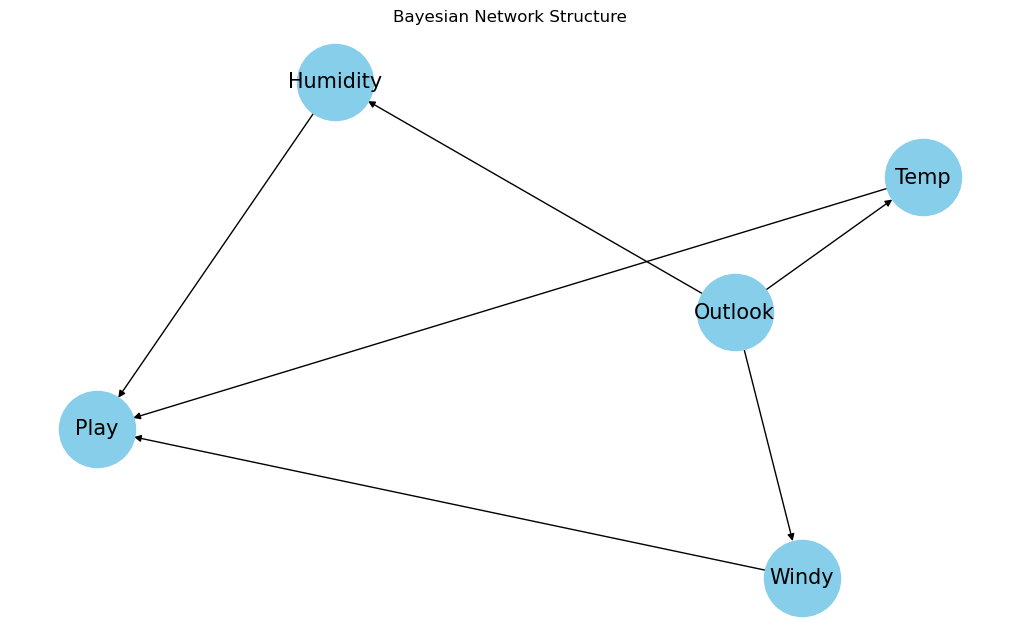

In [2]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Define the data
data = pd.DataFrame({
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
})

# Define the Bayesian Network structure
model = BayesianNetwork([('Outlook', 'Temp'), ('Outlook', 'Humidity'), ('Outlook', 'Windy'), ('Temp', 'Play'), ('Humidity', 'Play'), ('Windy', 'Play')])

# Estimate parameters
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Perform inference
inference = VariableElimination(model)
play_probability = inference.query(variables=['Play'], evidence={'Outlook': 'Sunny', 'Temp': 'Mild', 'Humidity': 'Normal', 'Windy': False})
print(play_probability)

# Convert Bayesian Network to NetworkX graph
bn_graph = nx.DiGraph()
bn_graph.add_nodes_from(model.nodes())
bn_graph.add_edges_from(model.edges())

# Draw structure of the Bayesian Network using NetworkX
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(bn_graph)  # Layout for the nodes
nx.draw(bn_graph, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=15, arrows=True)
plt.title("Bayesian Network Structure")
plt.show()


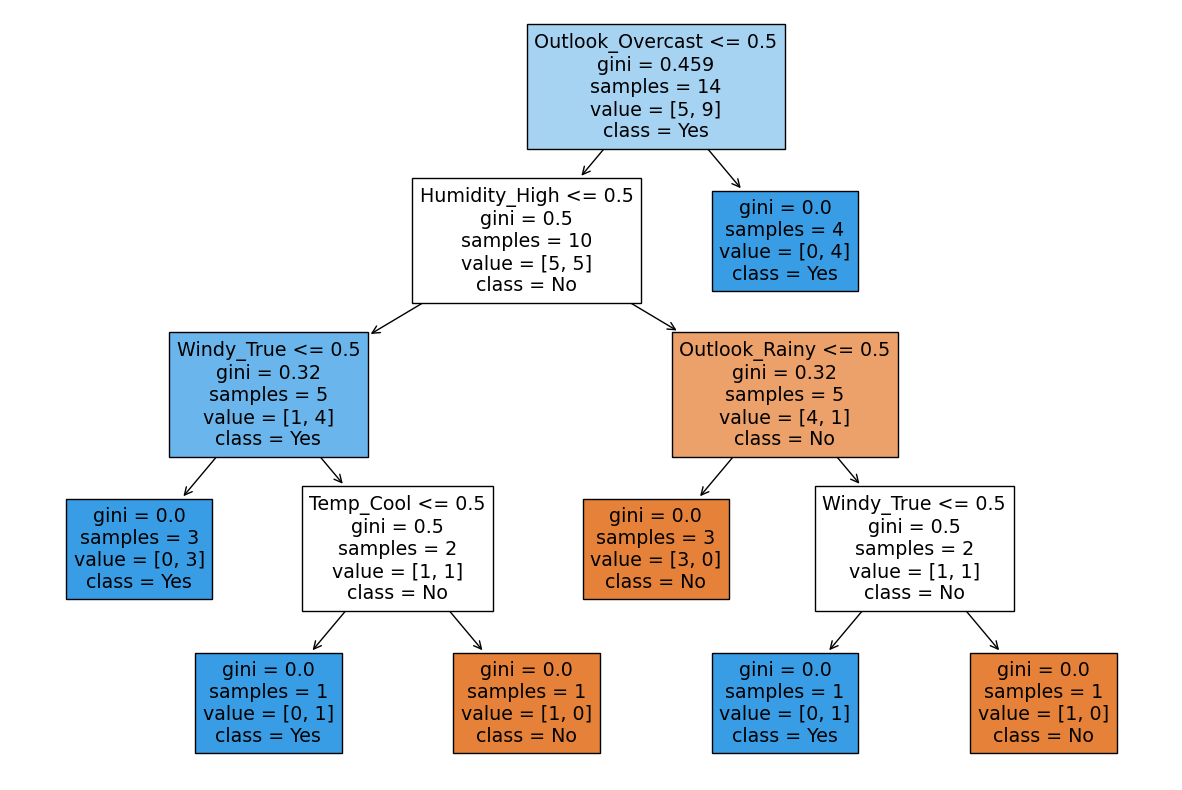

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Define the data
data = pd.DataFrame({
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
})

# Convert categorical variables to numerical
data = pd.get_dummies(data, columns=['Outlook', 'Temp', 'Humidity', 'Windy'])

# Define features and target
X = data.drop(columns=['Play'])
y = data['Play']

# Define and fit the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=list(X.columns), class_names=['No', 'Yes'], filled=True)
plt.show()